In [77]:
# First show that the performance improvement training with ccc and with kde diff over the baseline
p_score_metrics, score_metrics = [r'TVD$\downarrow$', r'JSD$\downarrow$'], [r'Activation$\uparrow$', r'Valence$\uparrow$']
p_baseline_scores, baseline_scores = [.515,.213], [.673,.573]
p_baseline_stds, baseline_stds = [.004,.003],[.008,.020]
p_mt_scores, mt_scores = [.503,.211],[.741,.571]
p_mt_stds, mt_stds = [.001,.001],[.005,.005]

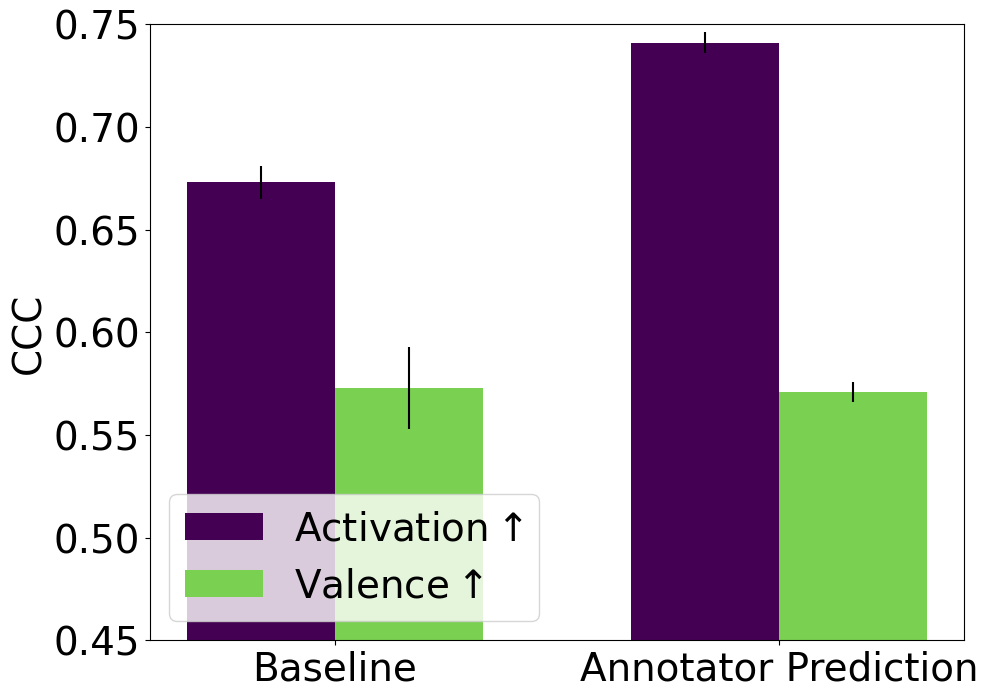

In [80]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 28}
matplotlib.rc('font', **font)

# JSD looks bad included on the plot -- skip
if len(score_metrics) == 4:
    remove_jsd = lambda x: [x[0]] + x[2:]
    score_metrics = remove_jsd(score_metrics)
    baseline_scores = remove_jsd(baseline_scores)
    baseline_stds = remove_jsd(baseline_stds)
    mt_scores = remove_jsd(mt_scores)
    mt_stds = remove_jsd(mt_stds)

cmap = matplotlib.colormaps['viridis']
cmap_max = 2.5
cmap_min = 0
rescale = lambda index: (index - cmap_min) / (cmap_max - cmap_min)
for i, metric in enumerate(score_metrics):
    scores = [baseline_scores[i], mt_scores[i]]
    stds = [baseline_stds[i], mt_stds[i]]
    increment = i * 0.5
    plt.bar([1+increment, 2.5+increment], scores, width=0.5, yerr=stds, label=metric, color=cmap(rescale(i*2)))
# tvd_scores = [baseline_scores[0], mt_scores[0]]
# plt.bar([1,2,3,4], baseline_scores, label='baseline')
plt.legend(loc='lower left')
plt.ylim(0.45,.750)
plt.xticks([1.25,2.75], labels=['Baseline', 'Annotator Prediction'])
plt.ylabel(r'CCC')
plt.gcf().set_size_inches(10.5,8)
plt.savefig('./figures/ccc_results.png', bbox_inches='tight')

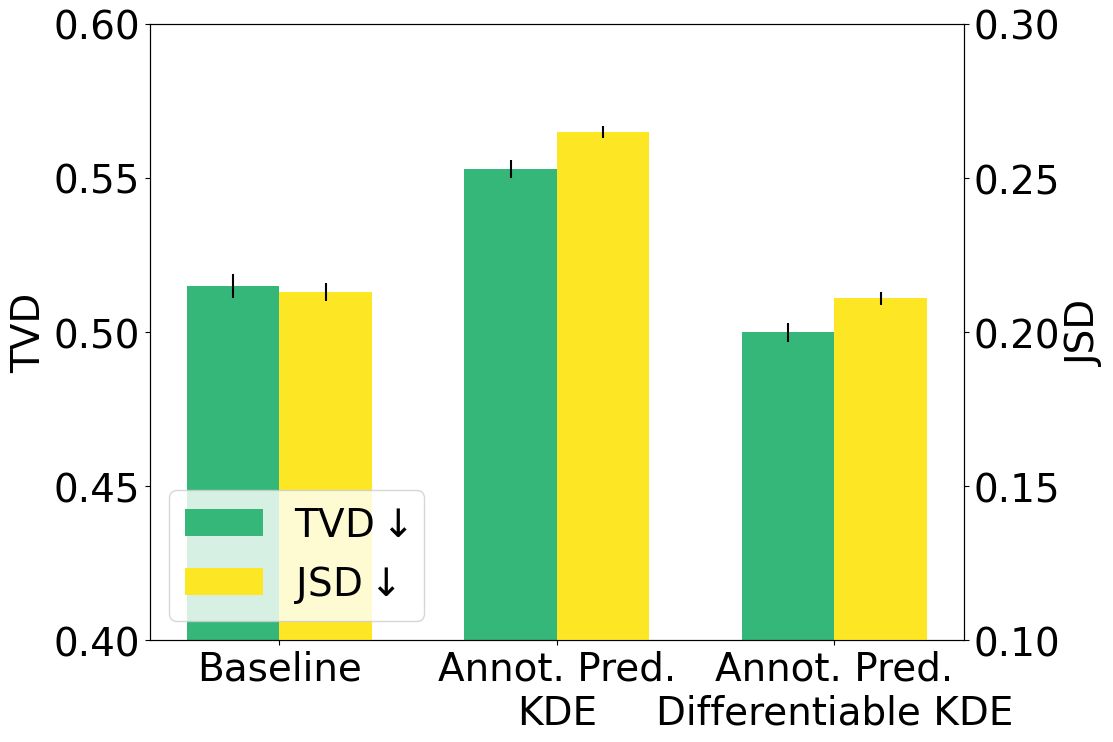

In [72]:
fig, ax = plt.subplots(figsize=(10.5,8))
ax2 = ax.twinx()
axs = [ax,ax2]
# Comparison with and without DiffKDE
without = [0.553, 0.265]
without_err = [0.003, 0.002]
with_ = [0.5, 0.211]
with_err = [0.003, 0.002]
score_metrics = [r'TVD$\downarrow$', r'JSD$\downarrow$']

cmap = matplotlib.colormaps['viridis']
cmap_max = 3
cmap_min = 0
rescale = lambda index: (index - cmap_min) / (cmap_max - cmap_min)
ps = []
for i, metric in enumerate(score_metrics):
    scores = [p_baseline_scores[i], without[i], with_[i]]
    stds = [p_baseline_stds[i], without_err[i], with_err[i]]
    increment = i * 1/3
    p = axs[i].bar([1+increment, 2+increment, 3+increment], scores, width=1/3, yerr=stds, label=metric, color=cmap(rescale(i+2)))
    axs[i].set_ylabel(metric.split('$')[0])
    ps.append(p)
# tvd_scores = [baseline_scores[0], mt_scores[0]]
# plt.bar([1,2,3,4], baseline_scores, label='baseline')
plt.legend(handles=ps, loc='lower left')
axs[0].set_ylim(0.40,0.60)
axs[1].set_ylim(0.10,0.30)
# plt.ylim(0.45,.750)
plt.xticks([1+1/6,2+1/6,3+1/6], labels=['Baseline', 'Annot. Pred.\nKDE', 'Annot. Pred.\nDifferentiable KDE'])
plt.gcf().set_size_inches(10.5,8)
plt.savefig('./figures/tvd_jsd_results.png', bbox_inches='tight')

In [52]:
# Cross Corpus Results
score_metrics = 'TVD'
datasets = ['MSP-Podcast', 'IEMOCAP', 'MuSE']
baseline_scores = [0.601, 0.633, 0.530]
baseline_stds = [0.003, 0.002, 0.004]
mt_scores = [0.518, 0.613, 0.470]
mt_stds = [0.005, 0.002, 0.002]

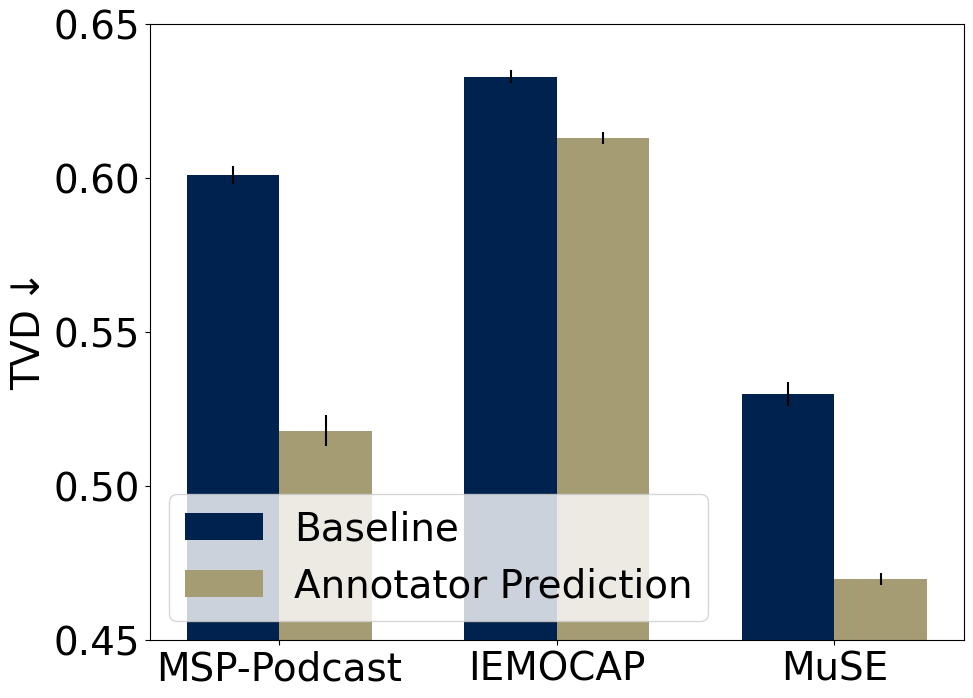

In [75]:
import matplotlib.pyplot as plt
import matplotlib

cmap = matplotlib.colormaps['cividis']
# cmap = 
cmap_max = 1.5
cmap_min = 0
rescale = lambda index: (index - cmap_min) / (cmap_max - cmap_min)
score_l = [baseline_scores, mt_scores]
std_l = [baseline_stds, mt_stds]
for i in range(2):
    scores = score_l[i]
    stds = std_l[i]
    increment = i * 0.5
    plt.bar([1+increment, 2.5+increment, 4+increment], scores, width=0.5, yerr=stds, label='Baseline' if i == 0 else 'Annotator Prediction', color=cmap(rescale(i)))
# tvd_scores = [baseline_scores[0], mt_scores[0]]
# plt.bar([1,2,3,4], baseline_scores, label='baseline')
plt.legend(loc='lower left')
plt.ylim(0.45,.65)
plt.ylabel(r'TVD$\downarrow$')
plt.xticks([1.25,2.75,4.25], labels=['MSP-Podcast', 'IEMOCAP', 'MuSE'])
plt.gcf().set_size_inches(10.5,8)
plt.savefig('./figures/cross_corpus_results.png', bbox_inches='tight')